In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import scipy.io as sio

In [10]:
annotations = glob.glob("../data/2020/*.mat")
labels = glob.glob("../data/2020/videos/InitialLabel*.mat")
positions = glob.glob("../data/2020/videos/InitialPos*.mat")
videos = [path.split('/')[-1] for path in glob.glob("../data/2020/videos/*.mp4") if not any(i in path for i in ['_annotated', '_seg', '_viz'])]
videos = sorted(videos)

In [11]:
annot = sio.loadmat(annotations[0])
label = sio.loadmat(labels[0])
position = sio.loadmat(positions[0])

In [12]:
max_labels = np.amax([np.amax(vid) for vid in label['InitialLabels'][0]])

## Generate Id distribution on the videos

In [13]:
video_labels = []
for video in label['InitialLabels'][0]:
    zero = np.zeros(max_labels)
    zero[video[0]-1] = 1
    video_labels.append(zero)
df = pd.DataFrame(video_labels)

[Text(0.5, 69.0, 'Pig ID'),
 Text(69.0, 0.5, 'Video ID'),
 Text(0.5, 1.0, 'Pig IDs distribution in videos')]

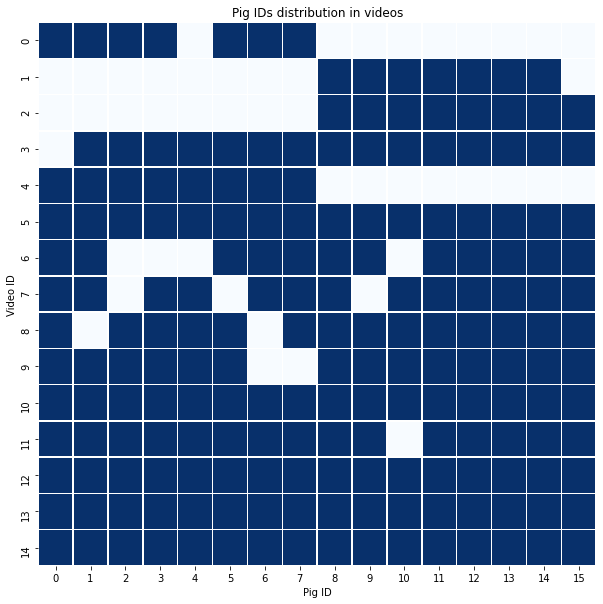

In [14]:
fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(df.values, cmap='Blues', linewidths=.5, cbar=False)
ax.set(xlabel='Pig ID', ylabel='Video ID', title="Pig IDs distribution in videos")

## Create visualization of video type distribution

[Text(0.5, 68.09375, 'Type'),
 Text(69.0, 0.5, 'Video ID'),
 Text(0.5, 1.0, 'Type of video')]

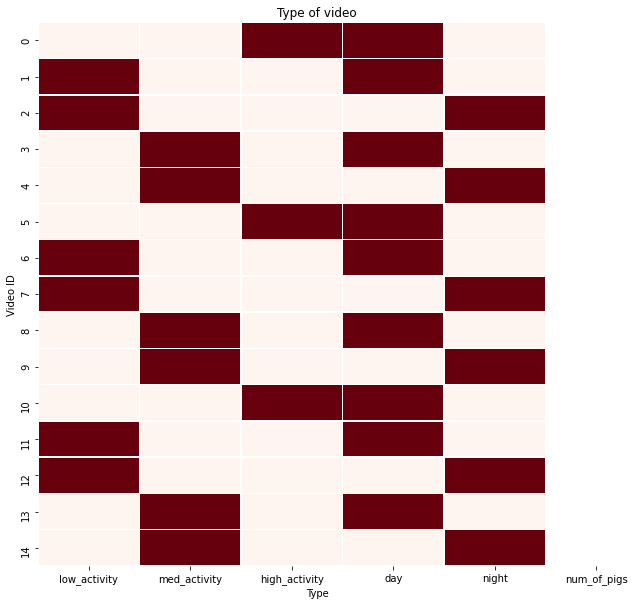

In [20]:
vid_data = []
for idx, video in enumerate(videos):
    vid_data.append(
        [
            'low_activity' in video,
            'medium_activity' in video,
            'high_activity' in video,
            'day' in video,
            'night' in video,
            int(df.sum(axis = 1)[idx])
        ]
    )

vid_spec_df = pd.DataFrame(vid_data, columns=['low_activity', 'med_activity', 'high_activity', 'day', 'night', 'num_of_pigs'])
fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(vid_spec_df[['low_activity', 'med_activity', 'high_activity', 'day', 'night']].values, cmap='Reds', linewidths=.5, xticklabels=vid_spec_df.columns, cbar=False)
ax.set(xlabel='Type', ylabel='Video ID', title="Type of video")

## Bar plots (counts)

[Text(0.5, 0, 'Num of videos for given num of pigs'),
 Text(0, 0.5, 'Num of pigs'),
 Text(0.5, 1.0, 'Num of pigs count summary')]

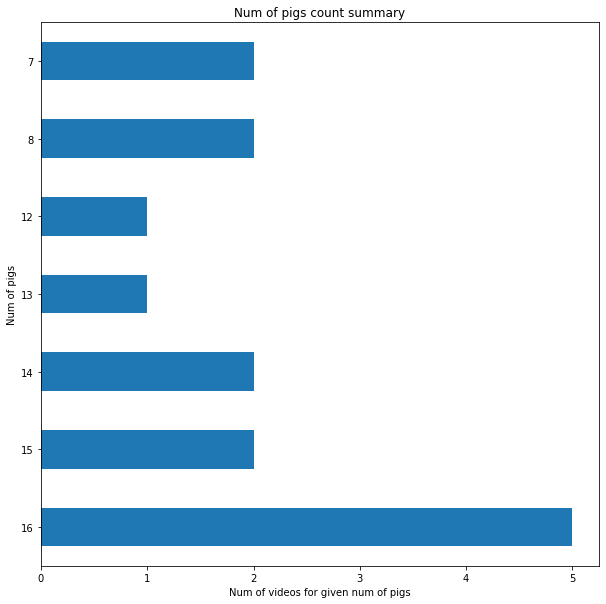

In [16]:
fig, ax = plt.subplots(figsize=(10,10))  
ax = vid_spec_df.num_of_pigs.value_counts().sort_index(ascending=False).plot(kind = 'barh')
ax.set(xlabel='Num of videos for given num of pigs', ylabel='Num of pigs', title="Num of pigs count summary")

,type,value
0,low_activity,6
1,med_activity,6
2,high_activity,3


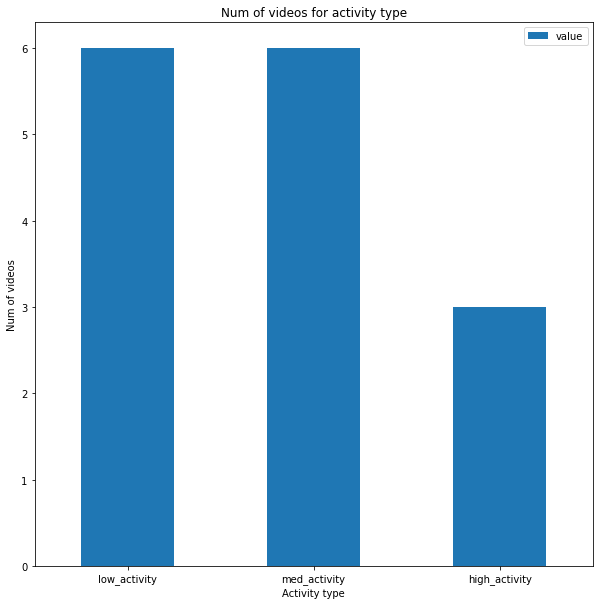

In [17]:
activity_data = [
    ['low_activity', vid_spec_df.low_activity.value_counts()[True]],
    ['med_activity', vid_spec_df.med_activity.value_counts()[True]],
    ['high_activity', vid_spec_df.high_activity.value_counts()[True]]
]
activity_df = pd.DataFrame(activity_data, columns=['type', 'value'])
ax = activity_df.plot.bar(x='type', y='value', rot=0, figsize=(10,10))
ax.set(ylabel='Num of videos', xlabel='Activity type', title="Num of videos for activity type")
activity_df

,type,value
0,day,9
1,nght,6


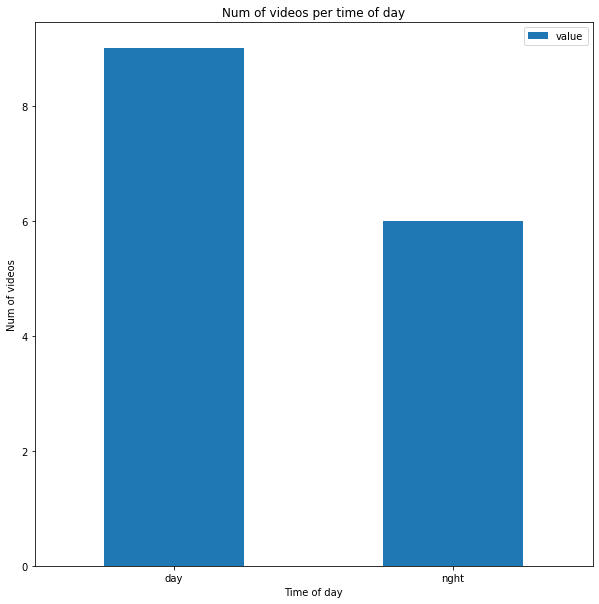

In [18]:
day_data = [
    ['day', vid_spec_df.day.value_counts()[True]],
    ['nght', vid_spec_df.night.value_counts()[True]],
]
day_df = pd.DataFrame(day_data, columns=['type', 'value'])
ax = day_df.plot.bar(x='type', y='value', rot=0, figsize=(10,10))
ax.set(ylabel='Num of videos', xlabel='Time of day', title="Num of videos per time of day")
day_df